In [1]:
from github import Github
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Now configure github and repo
orgName = "iiif"
repoName = "trc"
userName = "hadro"

with open('token.txt') as token:
    pwh = token.read().strip()

gh = Github(userName, pwh)
repo = gh.get_repo("%s/%s" % (orgName, repoName))

In [3]:
def plot_milestone(CURR_MILESTONE=1):
    # Find the issues for the current call
    milestone = repo.get_milestone(CURR_MILESTONE)
    issuelist = repo.get_issues(milestone=milestone)

    issues = list(issuelist)
    issues.sort(key=lambda x: x.number)
    
    df = pd.DataFrame()
    
    for issue in issues:
        reactions = list(issue.get_reactions())

        for reaction in reactions:
            df.loc[reaction.user.login, issue.number] = pd.to_datetime(reaction.created_at).date()
            

    for col in df:
        idx = pd.date_range(df[col].dropna().min(), df[col].dropna().max())
        df[col].groupby(df[col]).count().reindex(idx, fill_value=0).plot()

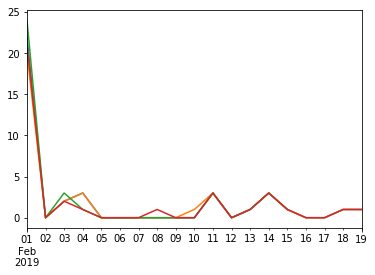

In [4]:
plot_milestone(CURR_MILESTONE=1)

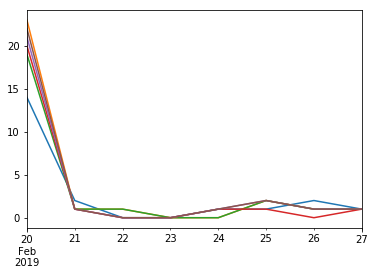

In [5]:
plot_milestone(CURR_MILESTONE=2)